In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
df = pd.read_csv('../data/tr_data_22_24.csv')

In [3]:
# Giving my self a little preview of the data
df.head()

site                 mode division region destination shipping_date  \
0  US77      less_truck_load      NaN   EMEA   Amsterdam    2022-01-01   
1  US62              std_air     F928   EMEA       Paris    2022-01-01   
2  TH2E  full_container_load     E916   EMEA       Dubai    2022-01-01   
3  US77              exp_air     E174   EMEA   Amsterdam    2022-01-01   
4  US77              exp_air     E174   EMEA       Dubai    2022-01-01   

  invoice_date  usda_invoice_amount  
0   2022-01-27           715.603599  
1   2022-01-02           368.346398  
2   2022-02-12          5605.915943  
3   2022-01-07          1327.171393  
4   2022-01-07          1237.849165

# EDA

In [4]:
df.head()

site                 mode division region destination shipping_date  \
0  US77      less_truck_load      NaN   EMEA   Amsterdam    2022-01-01   
1  US62              std_air     F928   EMEA       Paris    2022-01-01   
2  TH2E  full_container_load     E916   EMEA       Dubai    2022-01-01   
3  US77              exp_air     E174   EMEA   Amsterdam    2022-01-01   
4  US77              exp_air     E174   EMEA       Dubai    2022-01-01   

  invoice_date  usda_invoice_amount  
0   2022-01-27           715.603599  
1   2022-01-02           368.346398  
2   2022-02-12          5605.915943  
3   2022-01-07          1327.171393  
4   2022-01-07          1237.849165

In [5]:
df.dtypes

site                    object
mode                    object
division                object
region                  object
destination             object
shipping_date           object
invoice_date            object
usda_invoice_amount    float64
dtype: object

In [6]:
# Checking for weird dates
print('Shipping Date')
print(df['shipping_date'].min())
print(df['shipping_date'].max())
print('invoice Date')
print(df['invoice_date'].min())
print(df['invoice_date'].max())

Shipping Date
2022-01-01
2024-12-30
invoice Date
2022-01-02
2025-04-28


### Looking at NaN

In [7]:
# Checking to see how many NaN's are in each column.
df.isna().sum()

site                    8250
mode                     642
division               22956
region                     0
destination                0
shipping_date              0
invoice_date               0
usda_invoice_amount        0
dtype: int64

#### Site

In [8]:
# takeing a look at records with a NaN site.
df.loc[df['site'].isna()]

site                 mode division region   destination shipping_date  \
35      NaN           parcel_air     AF4C   EMEA         Paris    2022-01-01   
134     NaN  less_container_load     AF4C   AMER        Dallas    2022-01-01   
159     NaN           parcel_air     AF4C   AMER        Dallas    2022-01-01   
170     NaN              std_air     B13D   AMER      New York    2022-01-01   
210     NaN         parcel_grund     B1A2   EMEA         Paris    2022-01-02   
...     ...                  ...      ...    ...           ...           ...   
208628  NaN           truck_load     B13D   EMEA        Madrid    2024-12-30   
208713  NaN           truck_load     B13D   AMER        Dallas    2024-12-30   
208743  NaN           parcel_air     AF4C   AMER  Philadelphia    2024-12-30   
208749  NaN              std_air     B13D   AMER        Dallas    2024-12-30   
208784  NaN           parcel_air     AF4C   AMER      New York    2024-12-30   

       invoice_date  usda_invoice_amount  
35       2022-01-02           182.970141  
134      2022-04-15         15060.395775  
159      2022-01-02           511.210126  
170      2022-01-03           409.520436  
210      2022-01-03           480.444891  
...             ...                  ...  
208628   2025-01-11          4555.358427  
208713   2025-01-19           944.186993  
208743   2024-12-31          1703.431697  
208749   2025-01-06           504.805141  
208784   2024-12-31          1668.261162  

[8250 rows x 8 columns]

In [9]:
# Seeing is there is a patteren with 'division'
df.loc[df['division'] == 'B13D']['site'].value_counts(dropna=False)

site
CH22    4987
US77    4569
NaN     1741
Name: count, dtype: int64

Speaking with my Professor who served as the SME for this project. I learned that 'site' is not not physical location but it is more of a business function, it is a possibility that these are all shipments made by a business function that is not in the system. I am going to label these at 'No Site' for this reason. When doing some analysis I will pull these out to get a cleaner picture if needed.

In [10]:
# Filling in NaN is 'No Site'
df['site'] = df['site'].fillna('No Site')

#### Mode

In [11]:
# Taking a look at records with a NaN 'mode' 
df.loc[df['mode'].isna()]

site mode division region   destination shipping_date invoice_date  \
73         US77  NaN     B1A2   APAC  Kuala Lumpur    2022-01-01   2022-01-03   
222        US77  NaN     B1A2   EMEA          Kyiv    2022-01-02   2022-01-04   
673        CH22  NaN     D6C9   AMER      New York    2022-01-04   2022-01-05   
757     No Site  NaN      NaN   EMEA      Istanbul    2022-01-05   2022-01-07   
1024    No Site  NaN      NaN   AMER      New York    2022-01-06   2022-01-07   
...         ...  ...      ...    ...           ...           ...          ...   
207804     US77  NaN     B1A2   AMER      New York    2024-12-25   2024-12-30   
208055     US77  NaN     502D   EMEA         Milan    2024-12-27   2025-01-02   
208323  No Site  NaN      NaN   AMER        Dallas    2024-12-28   2025-01-01   
208521     US77  NaN     502D   AMER       Toronto    2024-12-29   2025-01-05   
208736     US77  NaN     B1A2   AMER  Philadelphia    2024-12-30   2025-01-01   

        usda_invoice_amount  
73               177.548545  
222              221.123656  
673               11.734341  
757               60.011364  
1024             176.587104  
...                     ...  
207804           147.286480  
208055            61.866551  
208323            95.148625  
208521            62.050062  
208736           191.238811  

[642 rows x 8 columns]

In [12]:
# taking a look at value count for 'mode' 
df['mode'].value_counts()
# 'other' is a possible value for these Nan's 

mode
less_truck_load        41413
truck_load             41175
less_container_load    30843
full_container_load    30471
std_air                24820
exp_air                24755
parcel_air              5778
parcel_grund            5654
other                   3248
Name: count, dtype: int64

With the NaN's being a very small part of the total record count, I am going to leave them NaN for now. It would be possible to classify these as 'Other' if the need for that to answer a business problem requires it. 

#### Division

In [13]:
# Taking a look at records with a NaN 'division' 
df.loc[df['division'].isna()]

site                 mode division region   destination shipping_date  \
0       US77      less_truck_load      NaN   EMEA     Amsterdam    2022-01-01   
8       US62         parcel_grund      NaN   EMEA    Manchester    2022-01-01   
14      US77      less_truck_load      NaN   EMEA        London    2022-01-01   
41      US77      less_truck_load      NaN   EMEA        London    2022-01-01   
47      US77      less_truck_load      NaN   APAC  Kuala Lumpur    2022-01-01   
...      ...                  ...      ...    ...           ...           ...   
208741  US77      less_truck_load      NaN   AMER       Toronto    2024-12-30   
208753  US77      less_truck_load      NaN   AMER        Dallas    2024-12-30   
208771  US77      less_truck_load      NaN   AMER      New York    2024-12-30   
208780  US77      less_truck_load      NaN   AMER      New York    2024-12-30   
208787  NL6F  full_container_load      NaN   AMER   Mexico City    2024-12-30   

       invoice_date  usda_invoice_amount  
0        2022-01-27           715.603599  
8        2022-01-02           169.612828  
14       2022-01-31          1521.062532  
41       2022-01-20             9.453186  
47       2022-01-05          1125.127083  
...             ...                  ...  
208741   2025-01-01          4645.264287  
208753   2025-01-01          3310.522706  
208771   2025-01-26          3733.890807  
208780   2025-01-27          3750.509724  
208787   2025-01-30         10901.202389  

[22956 rows x 8 columns]

In [14]:
df['division'].value_counts(dropna=False)

division
AF4C    46703
B1A2    25328
NaN     22956
F928    19057
0790    18621
98F8    14104
E174    12144
B13D    11297
BF10    11296
D6C9     9568
8C75     7439
E916     7007
502D     3279
Name: count, dtype: int64

With 'division' being a business label it will be hard to interpet anything about the value. I will leave these NaN.

### Invoice Stats

In [15]:
# Taking a look at 'usda_invoice_amount' descriptive statistics
df['usda_invoice_amount'].describe()

count    208799.000000
mean      12779.144711
std       20643.474634
min           0.007612
25%        1432.595629
50%        3669.154932
75%       10689.671877
max      192806.675931
Name: usda_invoice_amount, dtype: float64

### Invoice Delay
Insites will be derived from how delayed invoices are. Creating the feature now for future use.

In [16]:
# Getting the days delayed from shipping date to invoice date
df["shipping_date"] = pd.to_datetime(df["shipping_date"])
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["delay"] = df["invoice_date"] - df["shipping_date"]

In [17]:
# Gaining some insight into the new column
df['delay'].describe()

count                        208799
mean     20 days 15:26:03.162658825
std      24 days 11:18:12.027339446
min                 1 days 00:00:00
25%                 5 days 00:00:00
50%                12 days 00:00:00
75%                27 days 00:00:00
max               120 days 00:00:00
Name: delay, dtype: object

In [18]:
df['delay'].value_counts()

delay
1 days      21377
7 days       9864
6 days       9843
4 days       9715
3 days       9652
            ...  
80 days       233
115 days      232
79 days       227
106 days      224
91 days       210
Name: count, Length: 120, dtype: int64

In [19]:
# Checking out how many records are above 70 days or roughly 2 std away from the mean
df.loc[df['delay'] >=pd.Timedelta(days=70)]

site                 mode division region   destination shipping_date  \
20      NL6F  less_container_load     D6C9   EMEA       Baghdad    2022-01-01   
21      US77  less_container_load     B13D   EMEA      Istanbul    2022-01-01   
45      US77  less_container_load     98F8   APAC      Shanghai    2022-01-01   
46      CH22  less_container_load     0790   APAC         Delhi    2022-01-01   
60      US77  less_container_load     98F8   APAC          Seol    2022-01-01   
...      ...                  ...      ...    ...           ...           ...   
208745  US77  less_container_load     B13D   AMER      New York    2024-12-30   
208759  CH22  less_container_load     0790   AMER      New York    2024-12-30   
208760  CH22  less_container_load     0790   AMER      New York    2024-12-30   
208777  CH22  less_container_load     0790   AMER  Philadelphia    2024-12-30   
208778  US77  less_container_load     98F8   AMER        Dallas    2024-12-30   

       invoice_date  usda_invoice_amount    delay  
20       2022-04-25         13079.065685 114 days  
21       2022-03-12          5777.359943  70 days  
45       2022-04-22         28704.993289 111 days  
46       2022-04-06         24058.870154  95 days  
60       2022-04-24          1274.646078 113 days  
...             ...                  ...      ...  
208745   2025-03-20         49486.058510  80 days  
208759   2025-03-17         44573.771039  77 days  
208760   2025-04-11         50814.165984 102 days  
208777   2025-03-13         32686.597230  73 days  
208778   2025-04-22         42818.235826 113 days  

[13031 rows x 9 columns]

# Data Insites through visualization
Throughout the assignments we were guided through questions and prompts that needed to be answered through visualization. 

In [20]:
# Creating a custom theme for my plots
custom_theme = (
    theme_minimal()
    + theme(
        plot_title=element_text(size=20, color="Black", ha="center"),
        axis_line=element_line(color="gray", size=0.25),
        line=element_line(alpha=.25),
        axis_ticks_minor=None,
        axis_ticks_length=0
    )
    )

#### Which manufacturing site has placed the largest number of transportation tasks?

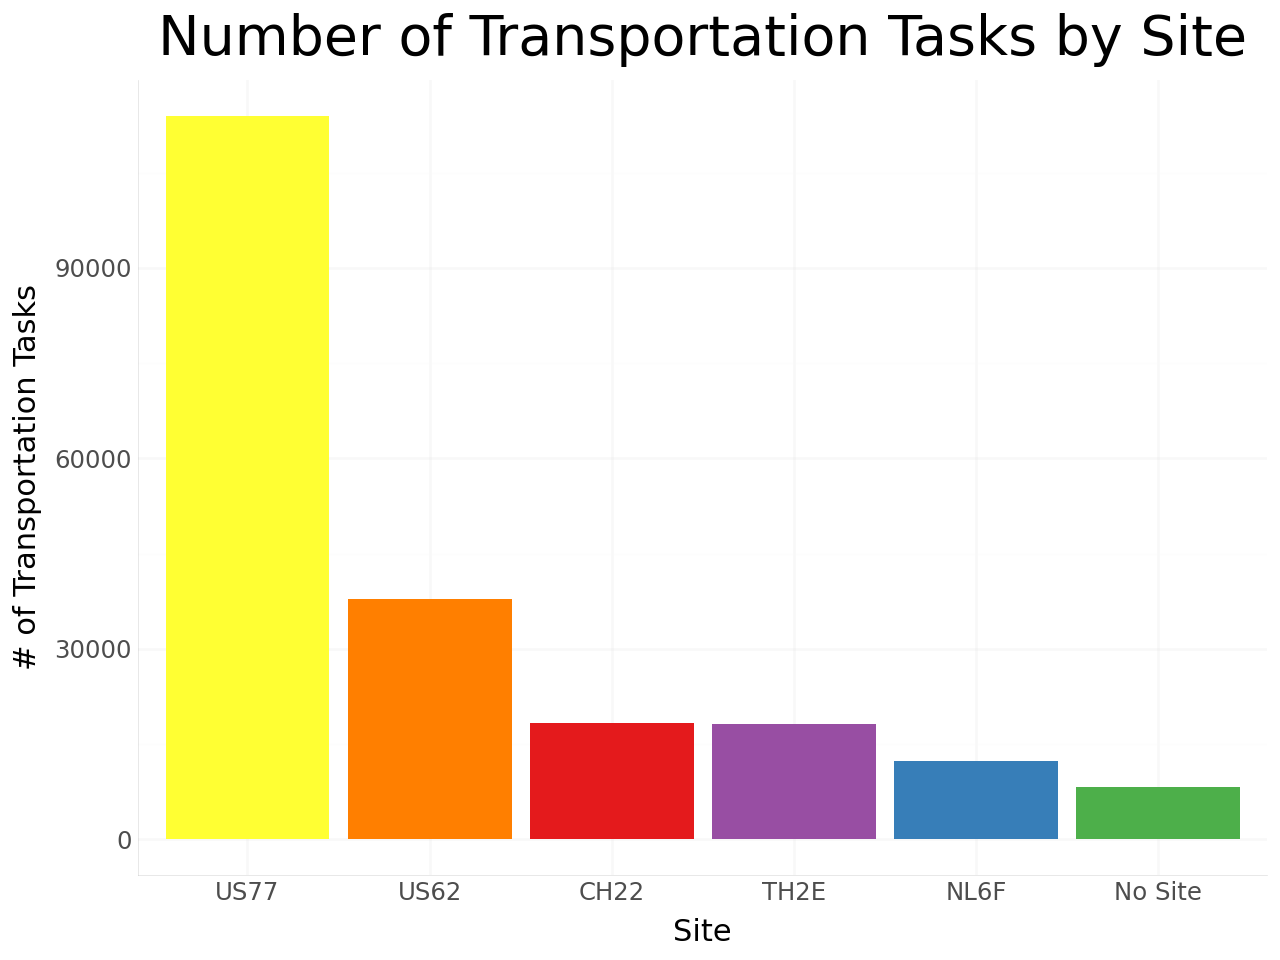

In [21]:
p1 = ggplot(data=df,
           mapping=aes(x="reorder(site, site, len, ascending=False)", fill='site'))


p1 = (
    p1 + geom_bar() +
    scale_fill_brewer(palette=6, type='qualitative') +
    guides(fill= False) +
    labs(x= 'Site', y='# of Transportation Tasks',
         title='Number of Transportation Tasks by Site')+
    custom_theme
)

p1

#### Does the largest manufacturing site change by region?

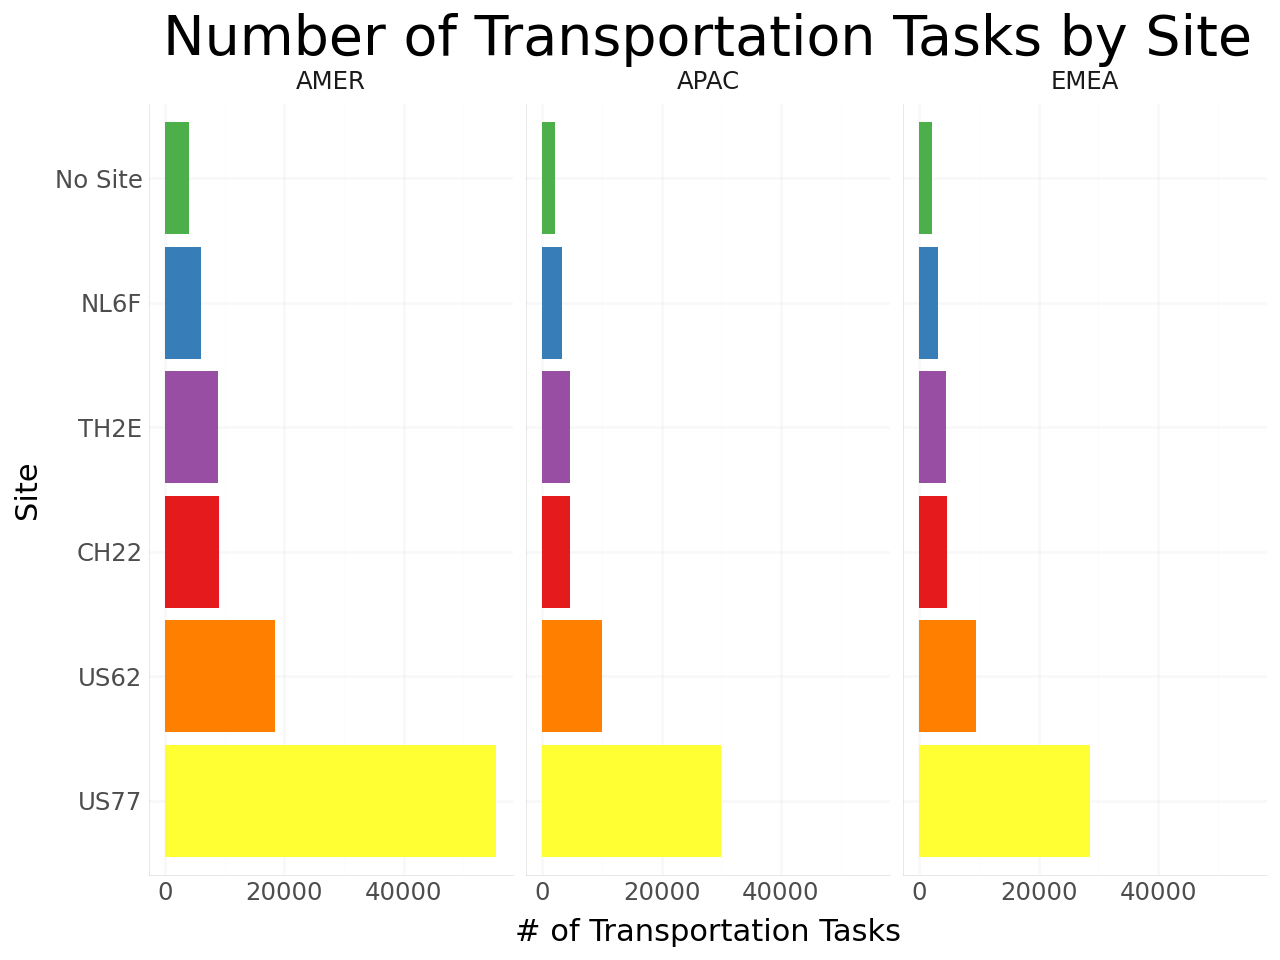

In [42]:
p2  = ggplot(data=df,
           mapping=aes(x="reorder(site, site, len, ascending=False)", fill='site'))

p2 = (
    p2 + geom_bar() +
    facet_wrap('region') +
    scale_fill_brewer(palette=6, type='qualitative') +
    guides(fill= False) +
    labs(x= 'Site', y='# of Transportation Tasks',
         title='Number of Transportation Tasks by Site')+
    coord_flip()+
    custom_theme
)

p2

#### Which transportation mode has been utilized the most?

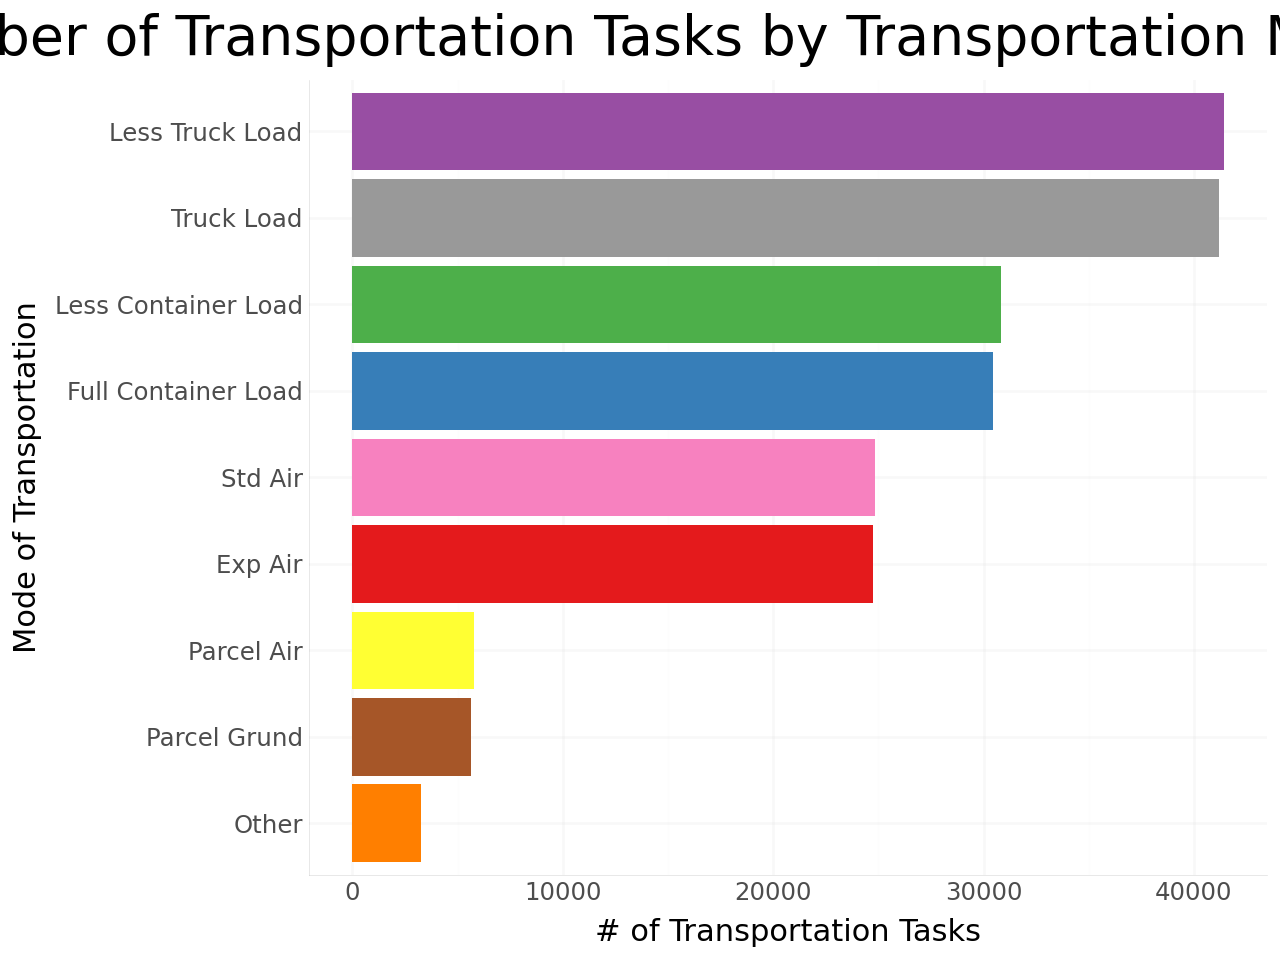

In [23]:
p3 = ggplot(data=df.query('mode.notna()'),
           mapping=aes(x='reorder(mode, mode, len)', fill='mode'))

p3 = (
    p3 + geom_bar() +
    scale_fill_brewer(palette=6, type='qualitative') +
    guides(fill= False) +
    labs(x= 'Mode of Transportation', y='# of Transportation Tasks',
         title='Number of Transportation Tasks by Transportation Mode')+
    scale_x_discrete(labels=lambda x : [val.replace('_',' ').title() for val in x]) +
    custom_theme +
    theme(plot_title_position='Left') +
    coord_flip()
)

p3

### Understanding Invoice Delay

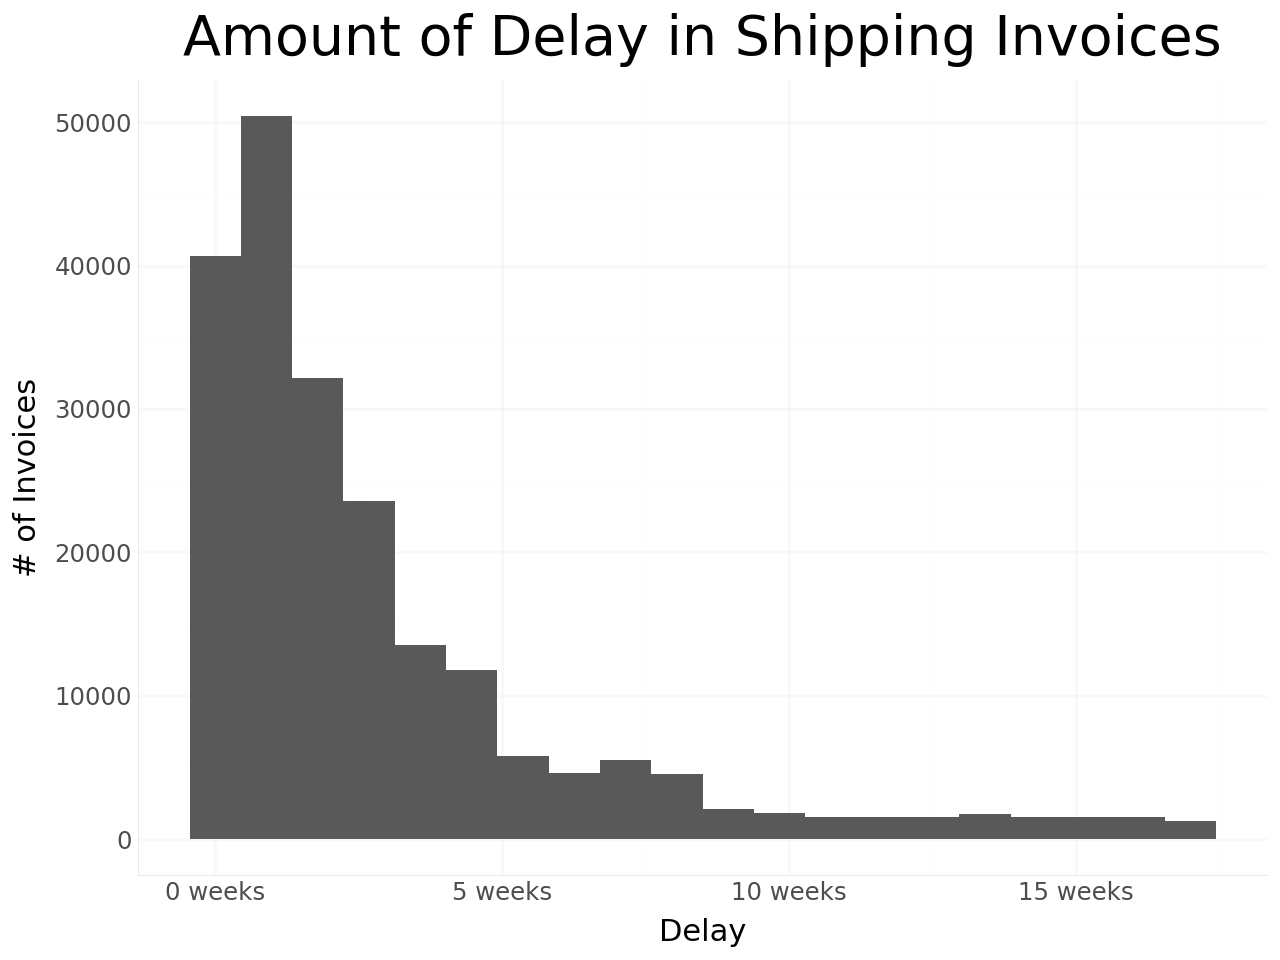

In [24]:
# plot for total number of invoices
p4 = ggplot(data=df, mapping=aes(x='delay'))

p4 = (
    p4 + geom_histogram(bins=20) +
    labs(x= 'Delay', y='# of Invoices',
         title='Amount of Delay in Shipping Invoices')+
    custom_theme
)

p4

This plot shows the distrabution of the delay in invoices. This is a left skewed plot telling us that a majority of the invoices and delayed by less than 5 weeks.

#### How is the Delay distributed across different regions?

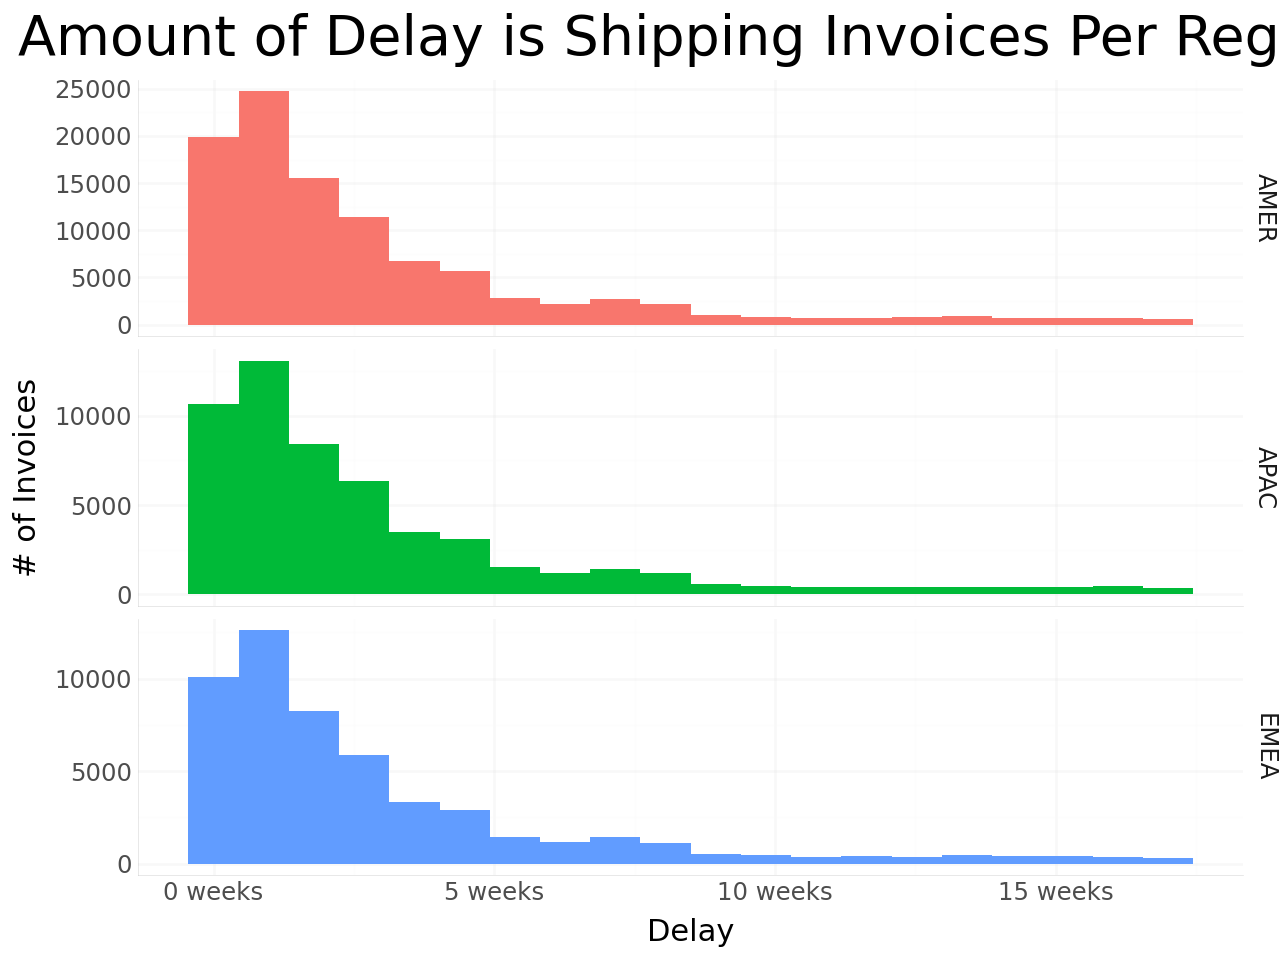

In [25]:
p5 = ggplot(data=df, mapping=aes(x='delay', fill = 'region'))

p5 = (
    p5 + geom_histogram(bins=20) +
    labs(x= 'Delay', y='# of Invoices',
         title='Amount of Delay is Shipping Invoices Per Region') +
    facet_grid('region', scales='free') +
    guides(fill= False) +
    custom_theme
)

p5

This plot shows the distrbution of delayed invoices by each region. All three regions have the same distrution showing that there is now difference in the number of delayed invoiced by region.

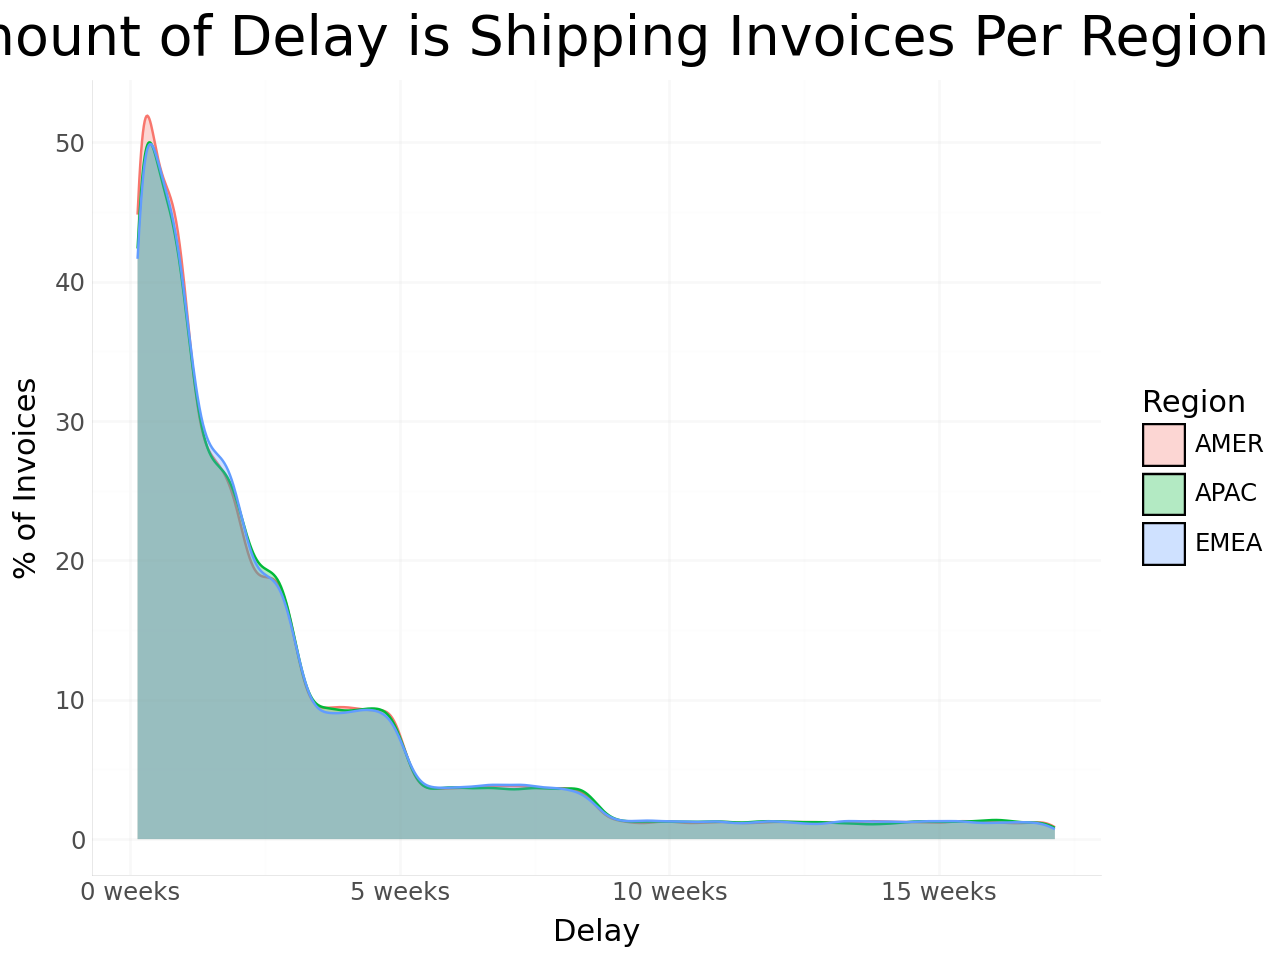

In [26]:
p6 = ggplot(data=df, mapping=aes(x='delay', fill = 'region', color='region'))

p6 = (
    p6 + geom_density(alpha = .3) +
    labs(x= 'Delay', y='% of Invoices',
         title='Amount of Delay is Shipping Invoices Per Region',
         fill='Region') +
    scale_y_continuous(labels=lambda x: [int(val*1000) for val in x]) +
    guides(color=False) +
    custom_theme
)

p6

This is a density plot showing the % of delayed invoices by each region. This line basically overlap eachother showing no difference in the Delayed invoices per region. 

#### How is the Delay distributed across different sites?

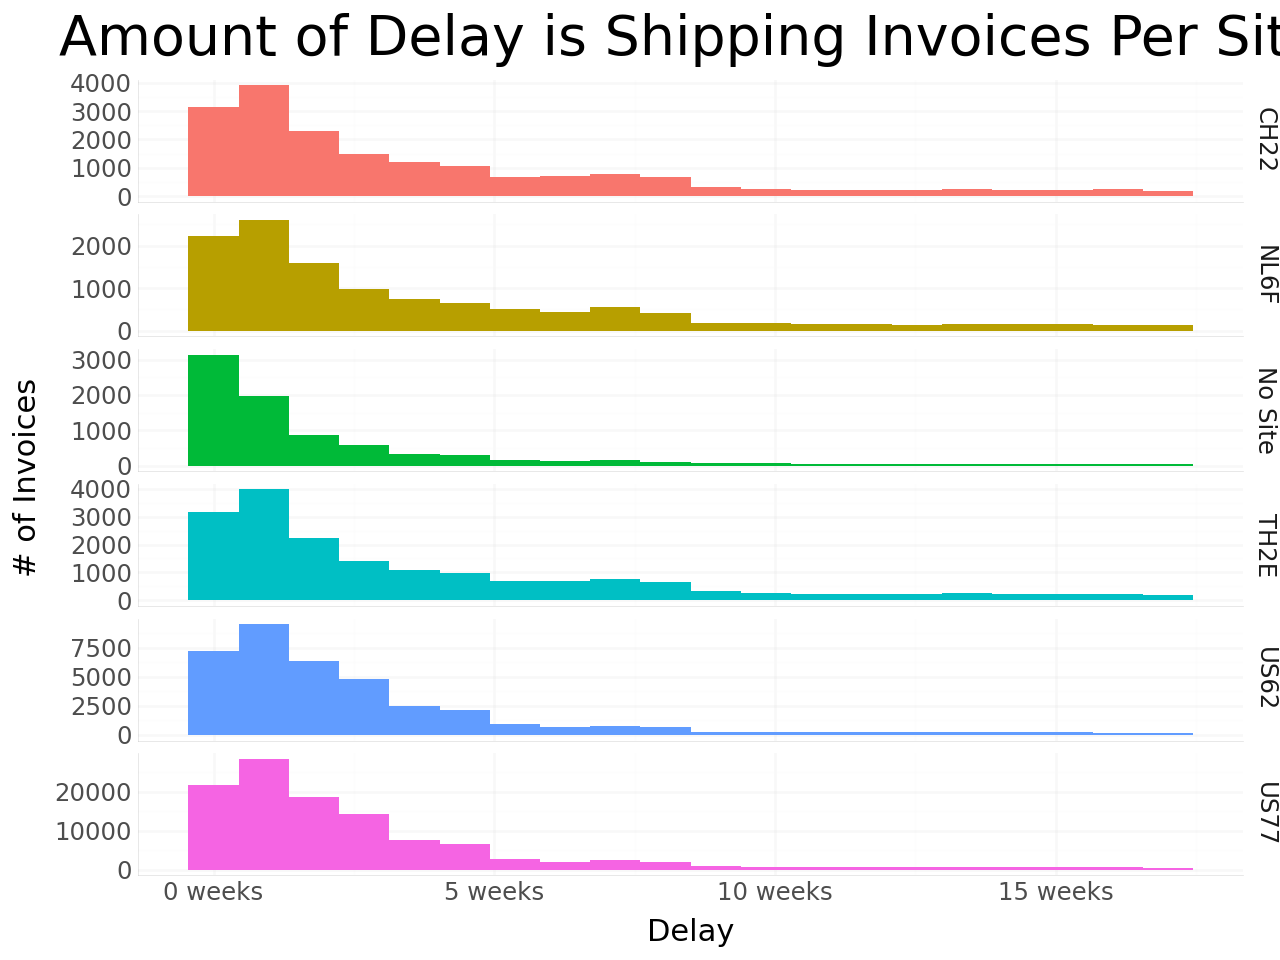

In [27]:
p7 = ggplot(data=df, mapping=aes(x='delay', fill = 'site'))

p7 = (
    p7 + geom_histogram(bins=20) +
    labs(x= 'Delay', y='# of Invoices',
         title='Amount of Delay is Shipping Invoices Per Site') +
    facet_grid('site', scales='free') + 
    guides(fill= False) +
    custom_theme
)

p7

This plot shows the distrbution of delayed invoices by each site. All three regions have the same distrution showing that there is very little difference in the number of delayed invoiced by site. 

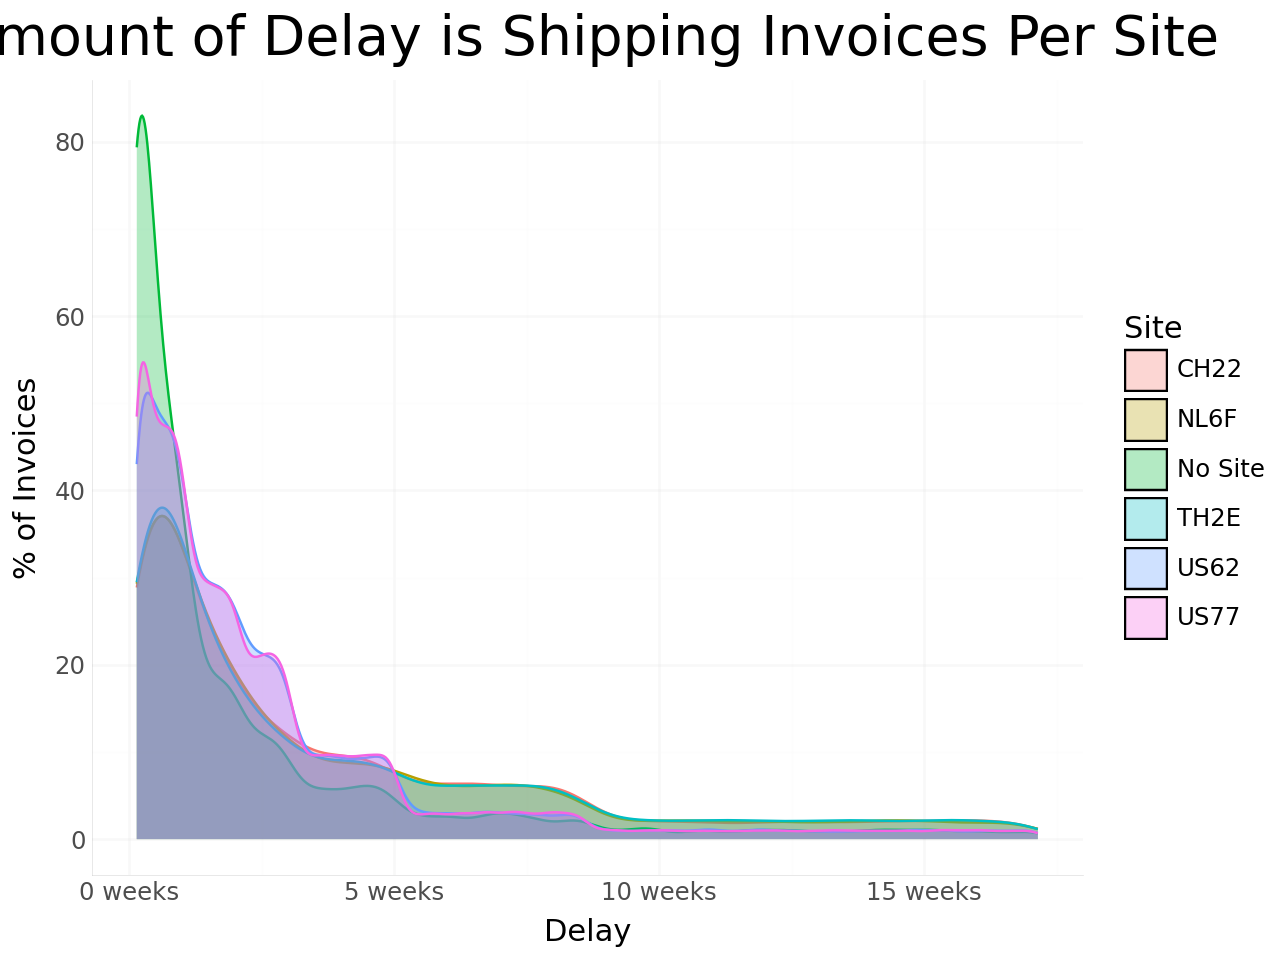

In [28]:
p8 = ggplot(data=df, mapping=aes(x='delay', fill = 'site', color='site'))

p8 = (
    p8 + geom_density(alpha = .3) +
    labs(x= 'Delay', y='% of Invoices',
         title='Amount of Delay is Shipping Invoices Per Site',
         fill='Site') +
    scale_y_continuous(labels=lambda x: [int(val*1000) for val in x]) +
    guides(color=False) +
    custom_theme
)

p8

This is a density plot showing the % of delayed invoices by each site. All of these line are very close of one another showing a very small difference between the sites. In out further analysis this would not be worth our time to investigate further. 

### Understanding the relationship between delay and invoice amount.

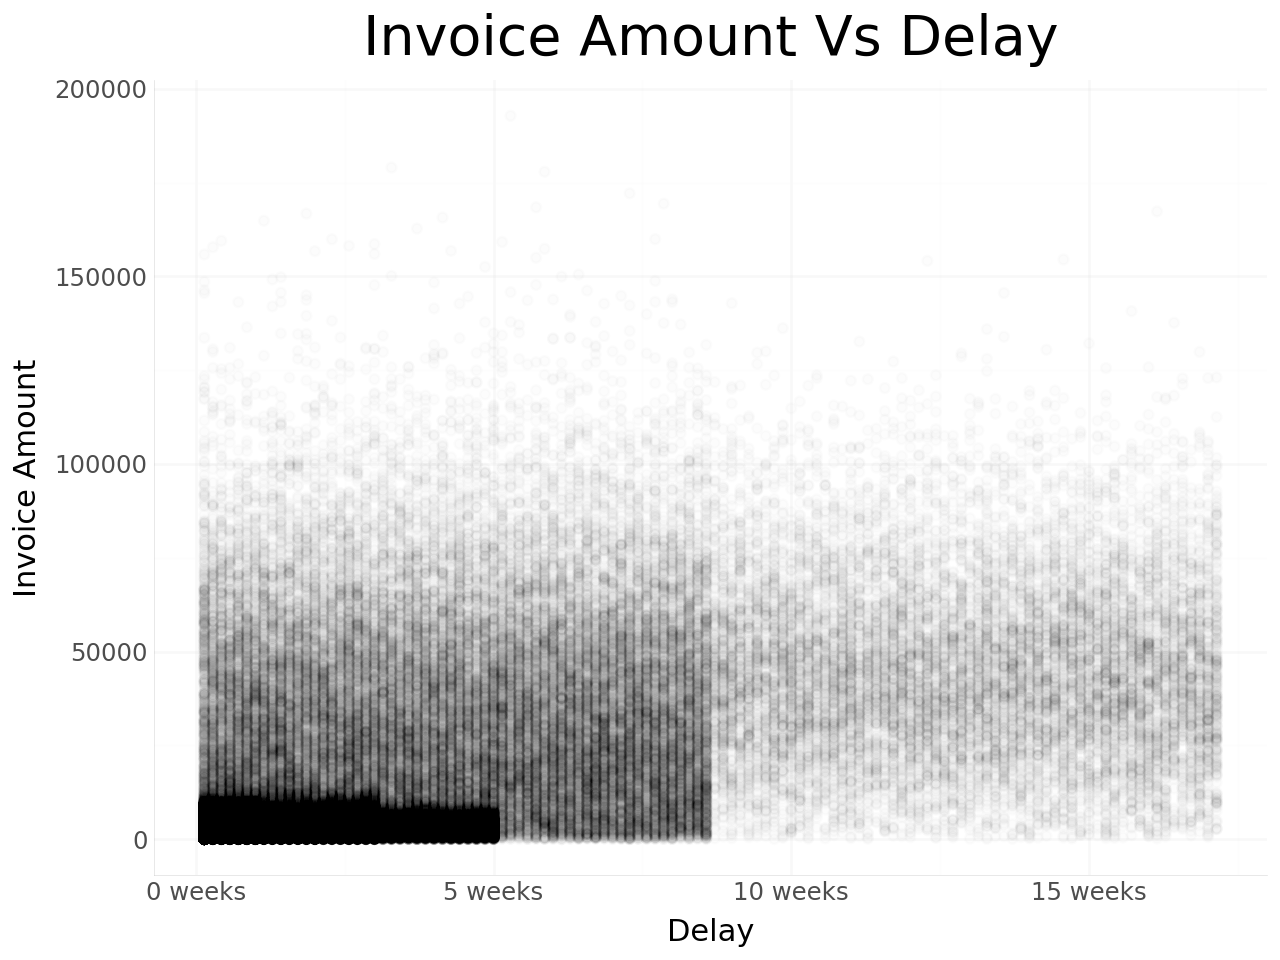

In [29]:
p9 = ggplot(data=df, mapping=aes(x='delay', y= 'usda_invoice_amount'))

p9 = (
    p9 + geom_point(alpha=.01) +
    labs(x= 'Delay', y='Invoice Amount',
         title='Invoice Amount Vs Delay') +
    custom_theme
)

p9

This is a distrabution plot of the invoice amount by the invoice delay. The main points in this plot are the high density of values in the lower left side. Also, the light value count on the right hand side is also something to consider.

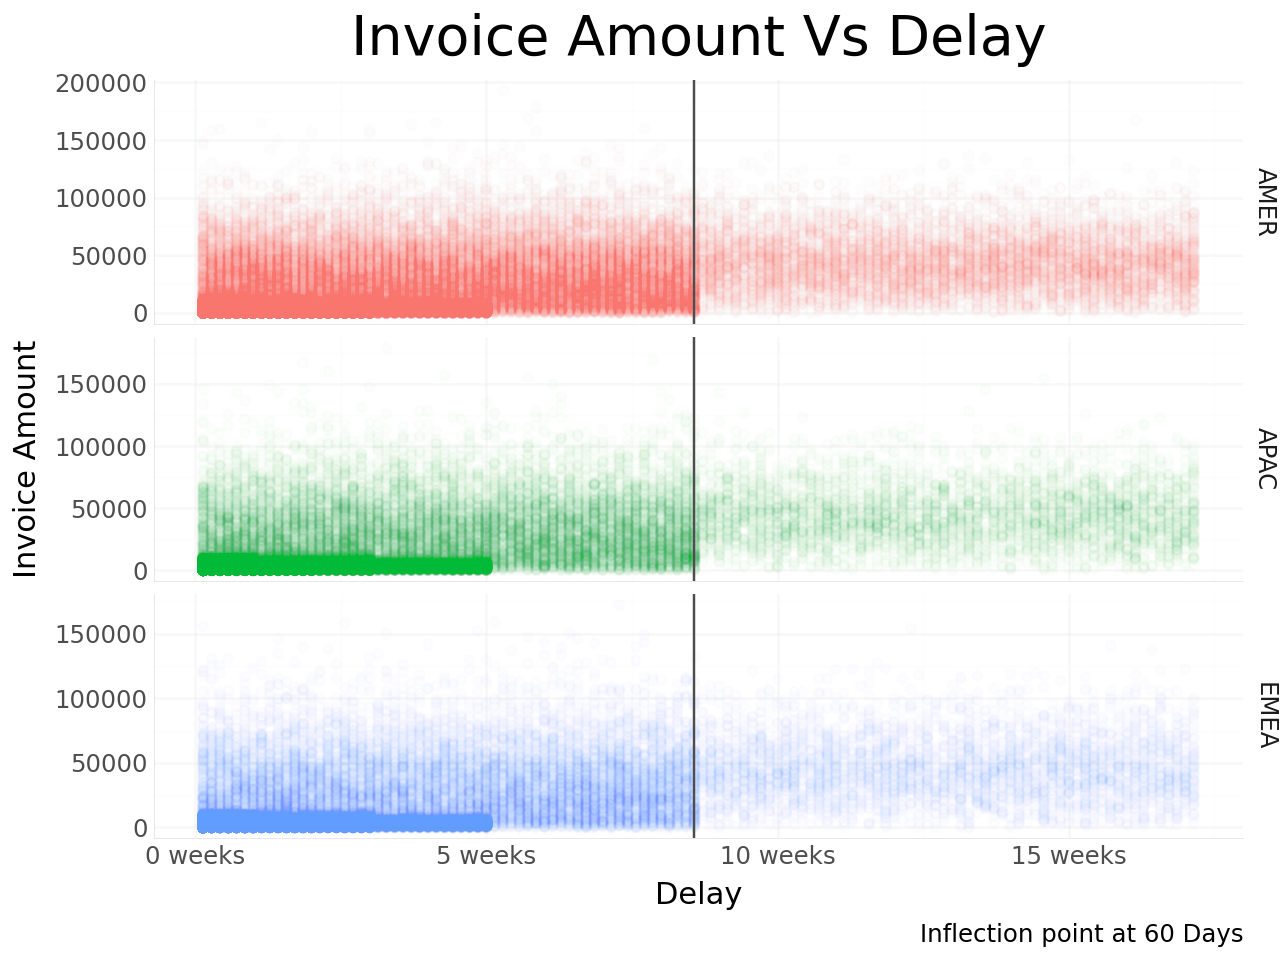

In [30]:
p10 = ggplot(data=df, mapping=aes(x='delay', y= 'usda_invoice_amount', color='region'))

p10 = (
    p10 + geom_point(alpha=.01) +
    labs(x= 'Delay', y='Invoice Amount',
         title='Invoice Amount Vs Delay',
         caption='Inflection point at 60 Days') +
    facet_grid('region', scales='free') +
    guides(color= False) +
    geom_vline(xintercept = pd.Timedelta(days=60), color = "#4d4d4d") +
    custom_theme
)

p10

This is a distrabution plot of the invoice amount by the invoice delay seperated by region. All three regions have the same pattern. I also put a point of interest line at day 60 to clearly show off the pattern changing at the time.

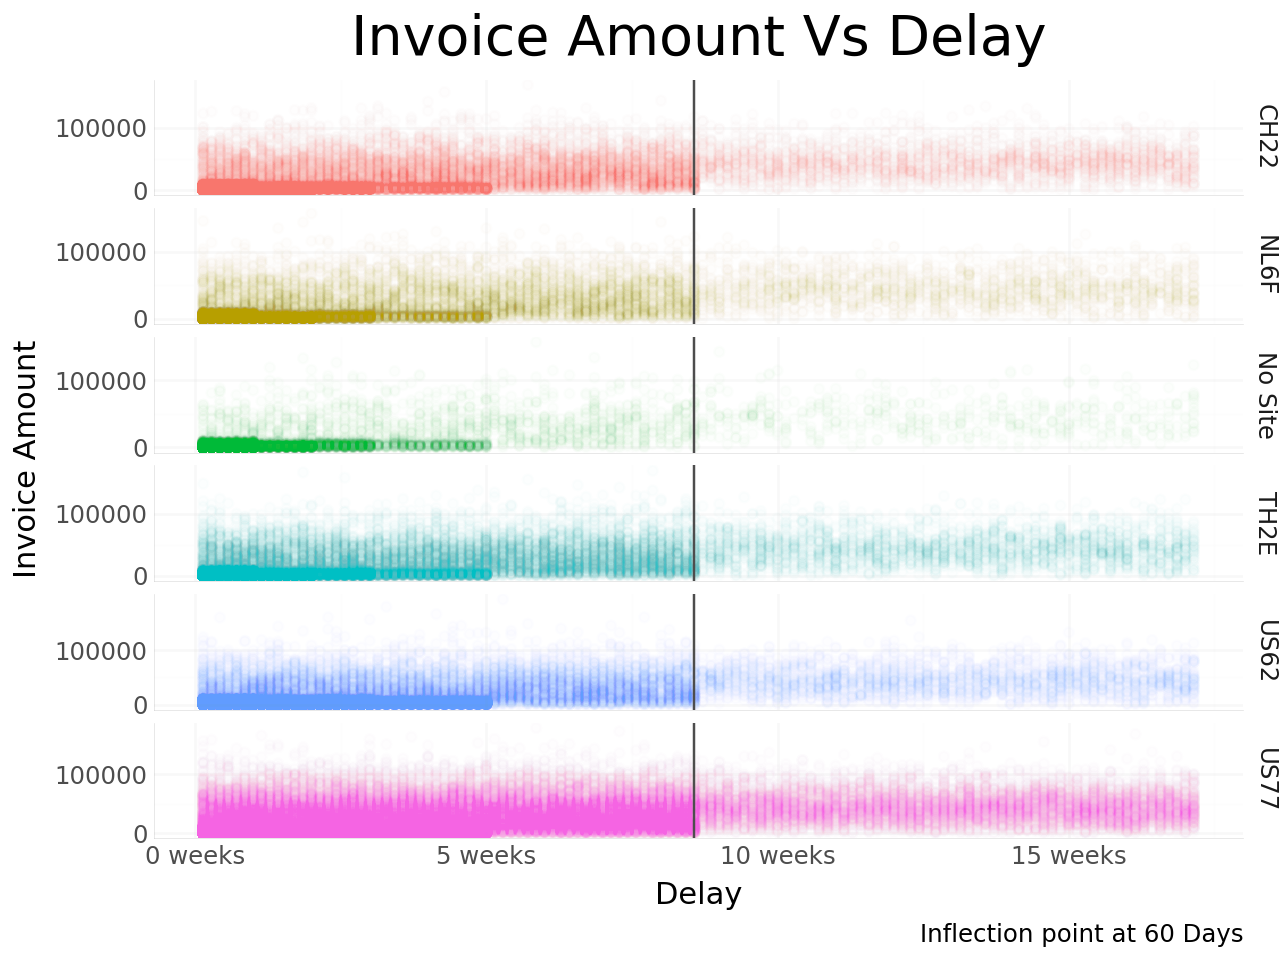

In [31]:
p11 = ggplot(data=df, mapping=aes(x='delay', y= 'usda_invoice_amount', color='site'))

p11 = (
    p11 + geom_point(alpha=.01) +
    labs(x= 'Delay', y='Invoice Amount',
         title='Invoice Amount Vs Delay',
         caption='Inflection point at 60 Days') +
    facet_grid('site', scales='free') +
    guides(color= False) + 
    geom_vline(xintercept = pd.Timedelta(days=60), color = "#4d4d4d") + 
    scale_y_continuous(breaks=[0,100000]) +
    custom_theme
)

p11

This is a distrabution plot of the invoice amount by the invoice delay seperated by site. All site have the same pattern with site 'US77' have a high desnity of invoices which is to be expected. I also put a point of interest line at day 60 to clearly show off the pattern changing at the time.

### Understanding delay by mode

In [32]:
# created bins for delay in invoice to help show the difference in values.
df['delay_bin']= pd.cut(df['delay'], bins=6, labels=['0-20','21-40','41-60','61-80','81-100','100-120'])

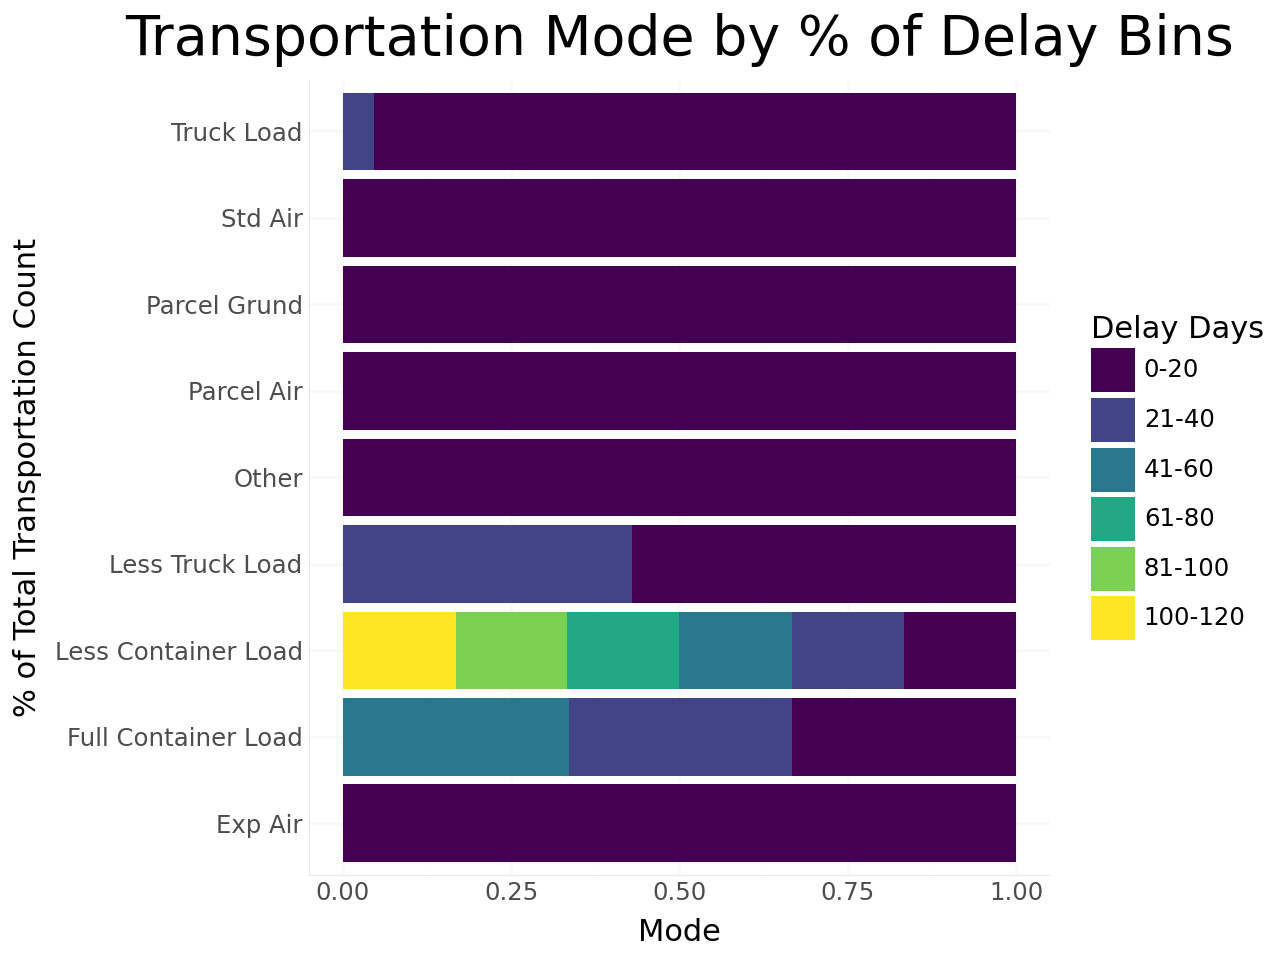

In [33]:
p12 = ggplot(data=df.query('mode.notna()'), mapping=aes(x='mode', fill='delay_bin'))

p12 = (
    p12 + geom_bar(position='fill') +
    labs(x= '% of Total Transportation Count', y='Mode',
         title='Transportation Mode by % of Delay Bins',
         fill='Delay Days') +
    scale_x_discrete(labels=lambda x : [val.replace('_',' ').title() for val in x]) +
    custom_theme +
    coord_flip()
)

p12

This Plot shows the breakdown of Transportation mode by the Delay in Invoice. A majority of the invoices all of delays within 0-20 days. What is interesting to point out is that the two container load transportation types is where most of the delays occur. The 'Less Container Load' transportation type is where all of the major delays happen.  

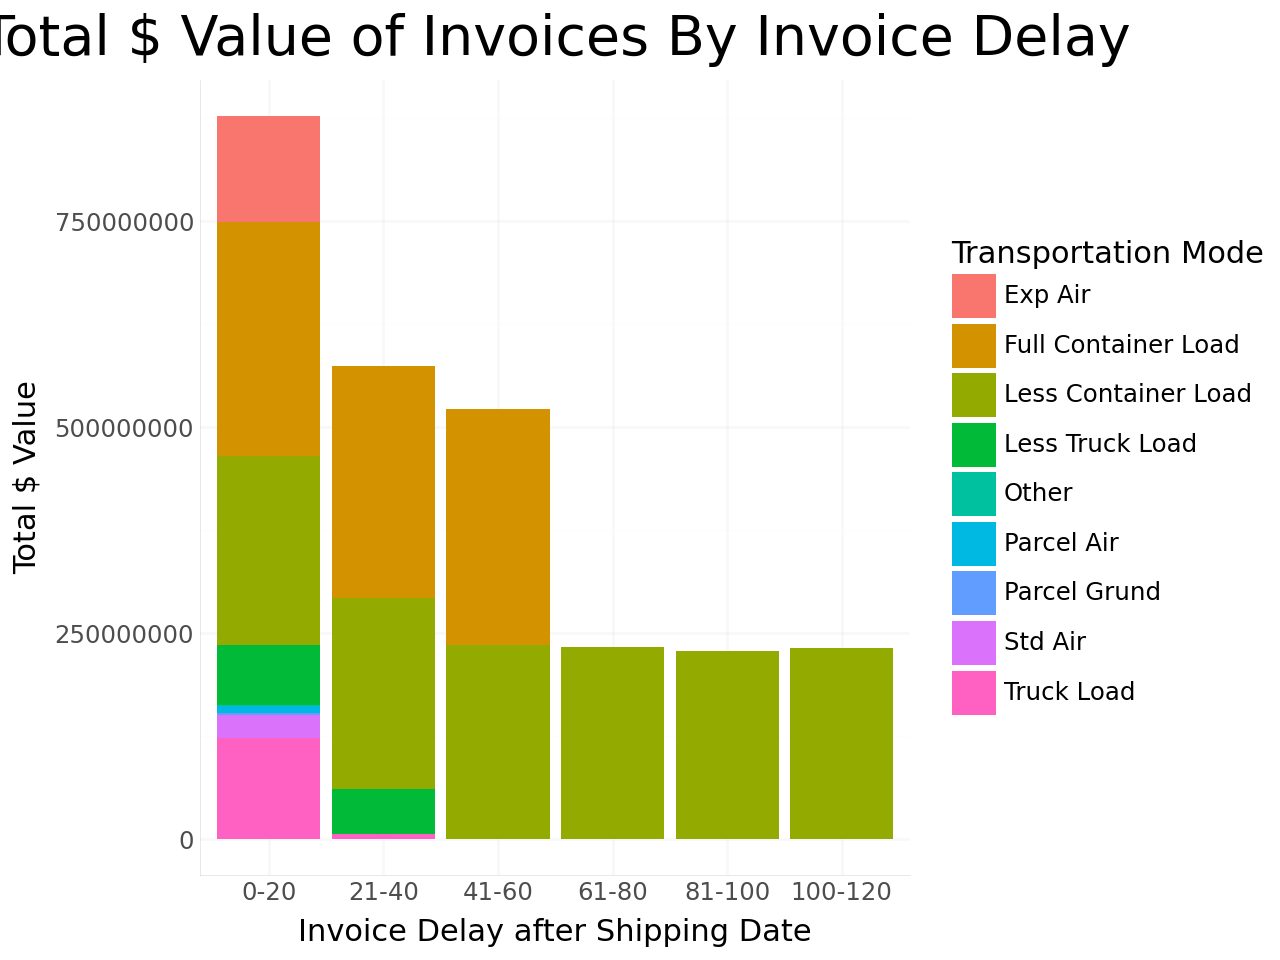

In [34]:
p13 = ggplot(data=df.query('mode.notna()'), mapping=aes(x='delay_bin', y='usda_invoice_amount', fill='mode'))

p13 = (
    p13 + geom_col() +
    labs(x= 'Invoice Delay after Shipping Date', y='Total $ Value',
         title='Total $ Value of Invoices By Invoice Delay',
         fill=('Transportation Mode'))
    + scale_fill_discrete(labels=lambda x : [val.replace('_',' ').title() for val in x]) +
    custom_theme
)

p13

This is a plot of the Invoice Delay groups with their total value of the invoices. I also broke down the bars by there Transportation Mode. What is interesting in the plot is that the only invoiced that are above 60 days are the 'Less Container Load' transportation mode. This will be the invoices to go look at when trying to predict the transportation cose delays. Another interesting point is how much dollor value is in the 'Full Container Load' and 'Less Container Load.' If we were able to get an better invoice speed in these two modes then we will have a more compleate picture of our transportation cost. 

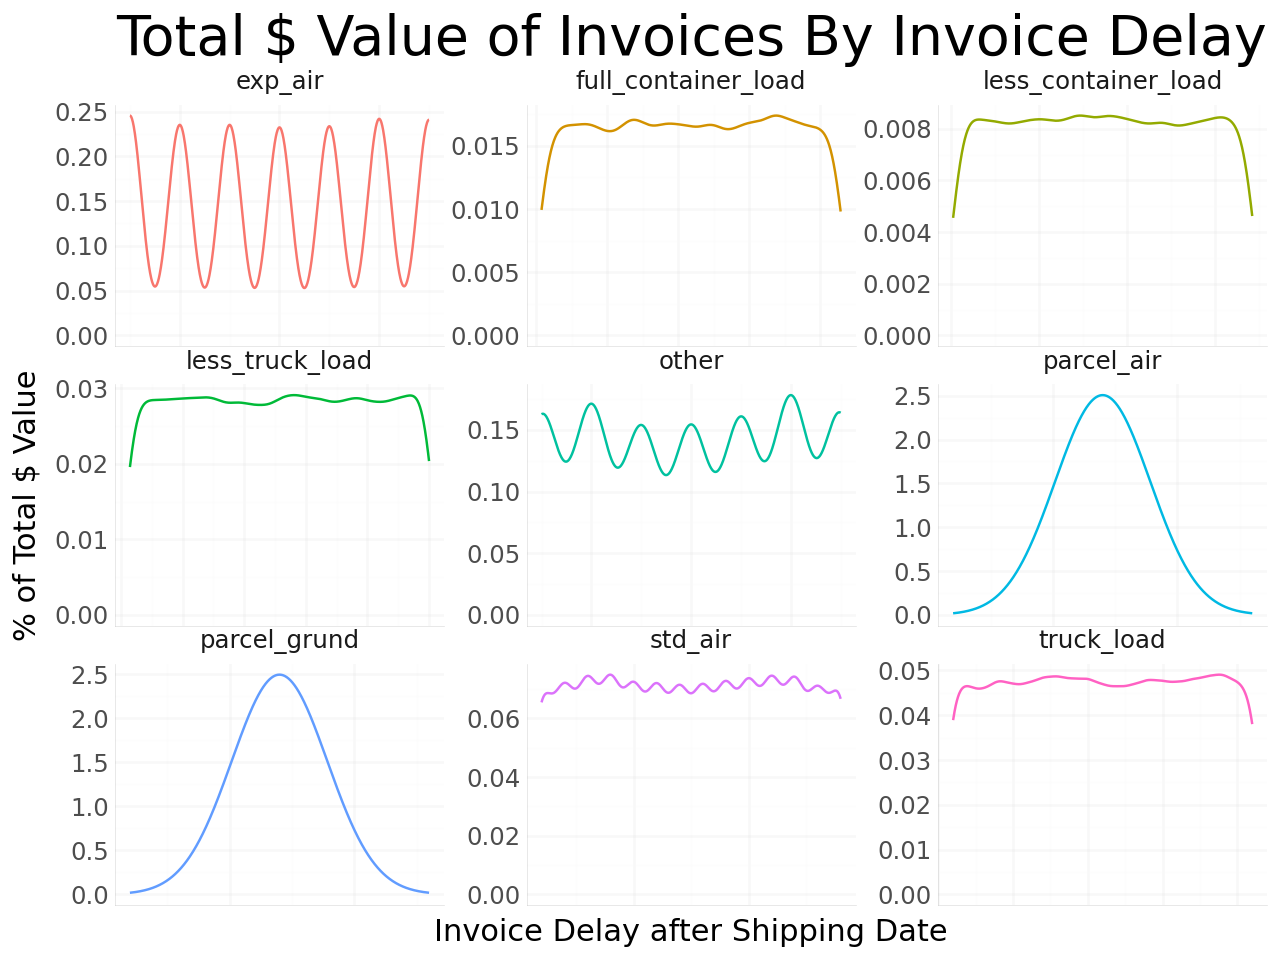

In [35]:
p14 = ggplot(data=df.query('mode.notna()'), mapping=aes(x='delay', color='mode')) 

p14 = ( 
    p14 + geom_density() +
    facet_wrap("mode", scales="free") +
    labs(x= 'Invoice Delay after Shipping Date', y='% of Total $ Value',
         title='Total $ Value of Invoices By Invoice Delay',
         fill=('Transportation Mode')) +
    guides(color= False) +
    custom_theme +
    theme(
        axis_text_x=element_blank()
    )
)
p14

This plot shows the density distribution for each shipping mode. The biggest takeaway from this plot is that similar shipping modes have very similar density distributions. For example, 'less_truck_load' and 'truck_load' both have similar distributions.

c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 12 x 6 in image.
c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/delay_dist_by_mode.png


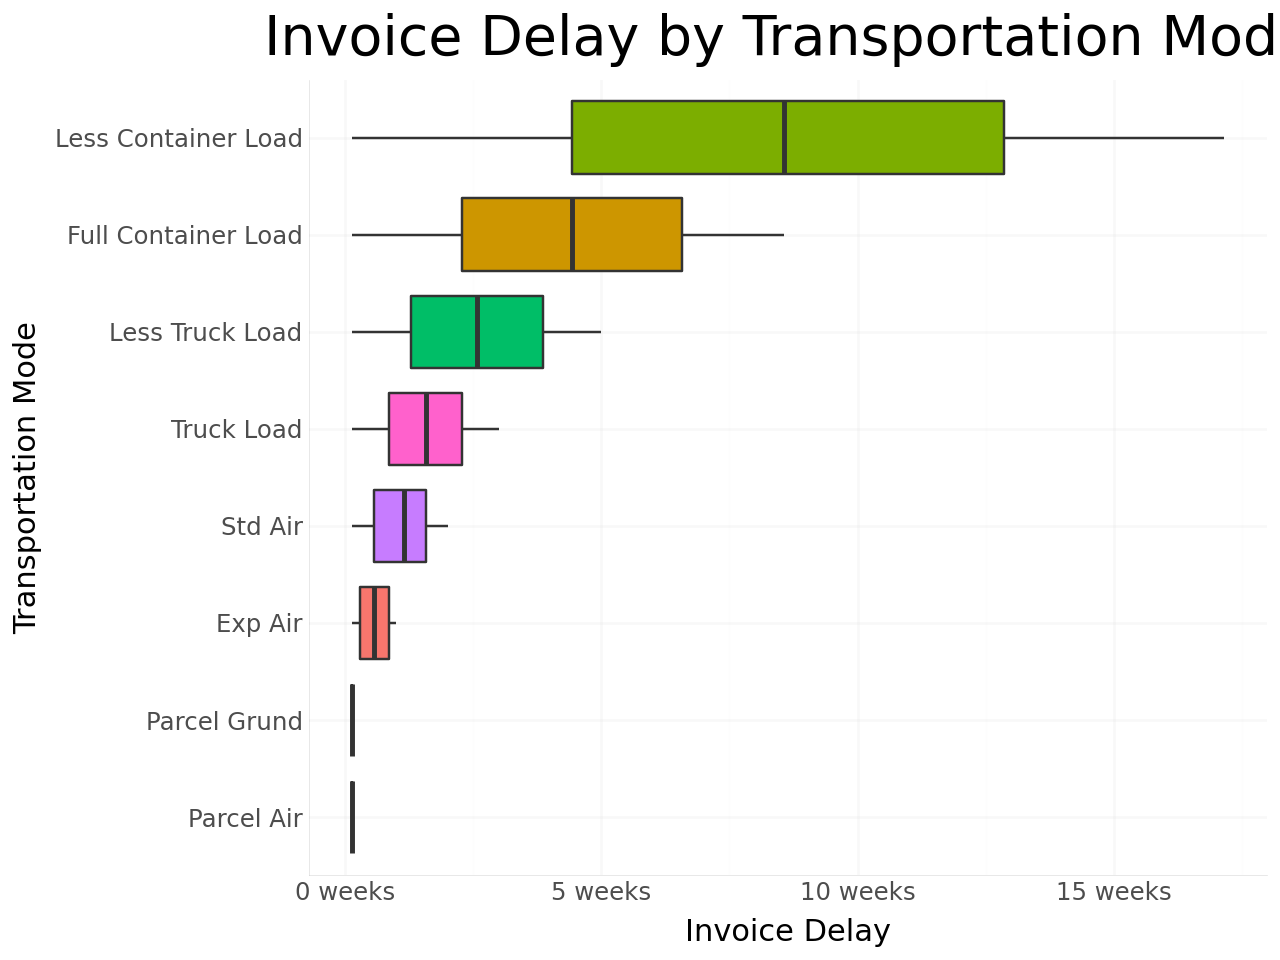

In [36]:
p15 = ggplot(data=df.query('mode.notna() and mode != "other"'),
           mapping=aes(x='reorder(mode, delay, fun=np.mean)', y='delay',
                       fill='mode'))

p15 = (
    p15 +
    geom_boxplot(outlier_shape = 'o', show_legend=False) +
    scale_x_discrete(labels=lambda x : [val.replace('_',' ').title() for val in x]) +
    coord_flip() +
    labs(
        x='Transportation Mode',
        y='Invoice Delay',
        title='Invoice Delay by Transportation Mode'
    ) +
    custom_theme
)
ggsave(p15,
       filename='../plots/' + 'delay_dist_by_mode.png',
       height=6,
       width=12,
       units='in',
       dpi=300
        )
p15

This plot shows a box plot for each of the different transportation modes. This allows me to understand the distribution and different distributions for each mode. 

### Invoices over time in the data.

c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 8 x 6 in image.
c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/invoice_totals_by_week.png


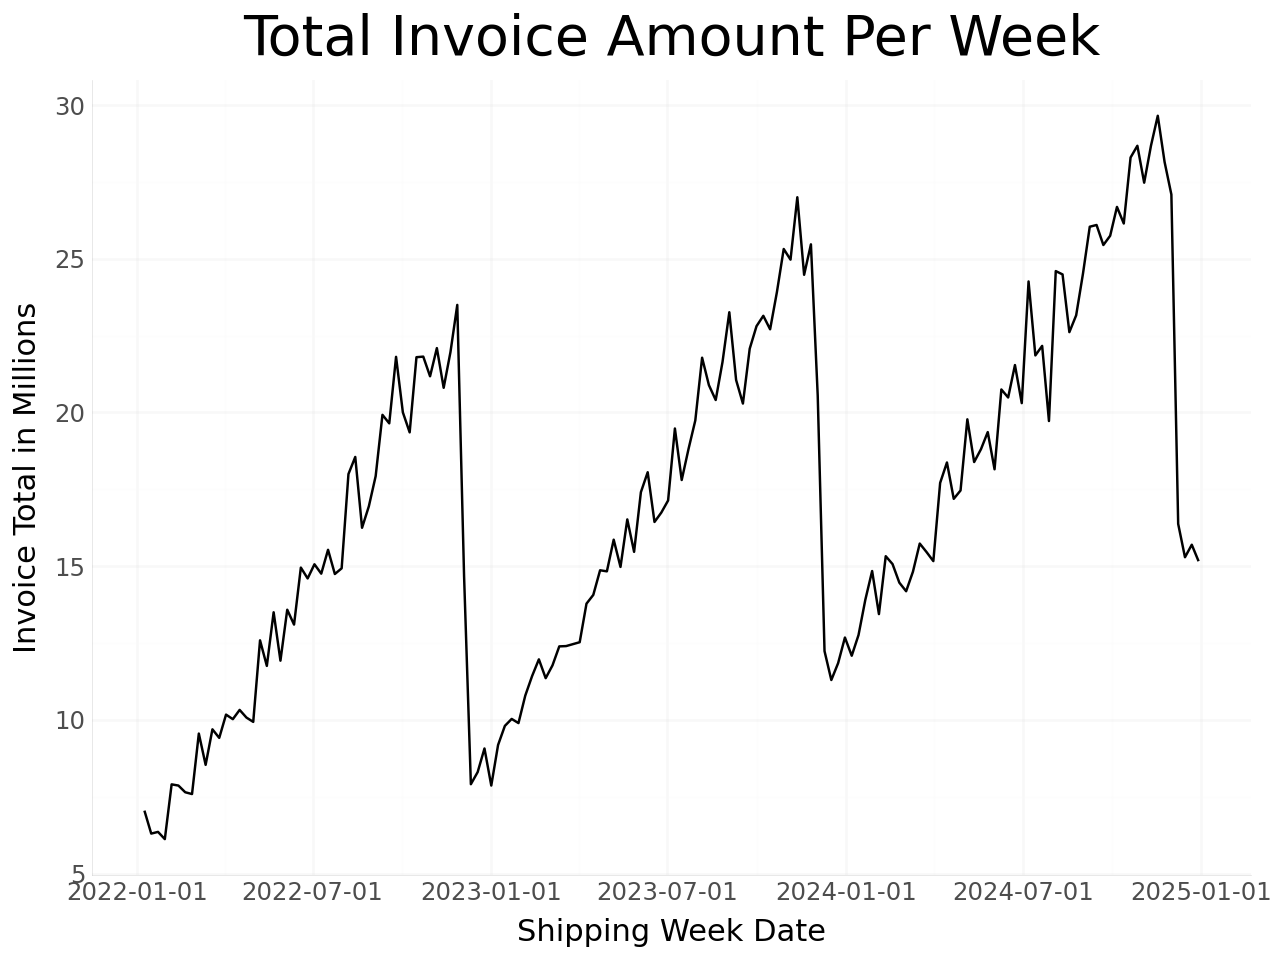

In [37]:
p16 = ggplot(data=df.query('mode.notna() and mode != "other"'
                    ).groupby(by=[pd.Grouper(key='shipping_date', freq='1W')]
                    ).aggregate({'usda_invoice_amount':'sum'}).reset_index()[1:-1],
            mapping=(aes(x='shipping_date',
            y='usda_invoice_amount')))

p16 = (
    p16 +
    geom_line() +
    scale_y_continuous(labels=lambda x : [int(val/1000000) for val in x]) +
    scale_x_date() +
    labs(
        x='Shipping Week Date',
        y='Invoice Total in Millions',
        title='Total Invoice Amount Per Week',
    ) +
    custom_theme
)
ggsave(p16,
       filename='../plots/' + 'invoice_totals_by_week.png',
       height=6,
       width=8,
       units='in',
       dpi=300
        )
p16
# Basic chart showing invoice totals by week
# Shows seasonallity

The graph above show the total invoice amounts by week. There is a clear seasonality and pattern in this plot that will greatly help us out when we are forcasting. Eventhough this plot can be usefull it may be as usefull as it could be due to the idea that we are looking at different 'mode' types. In the next plot I will break this same plot down by mode type to show possible differences in each mode.

c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 8 x 6 in image.
c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/invoice_totals_by_mode_facet.png


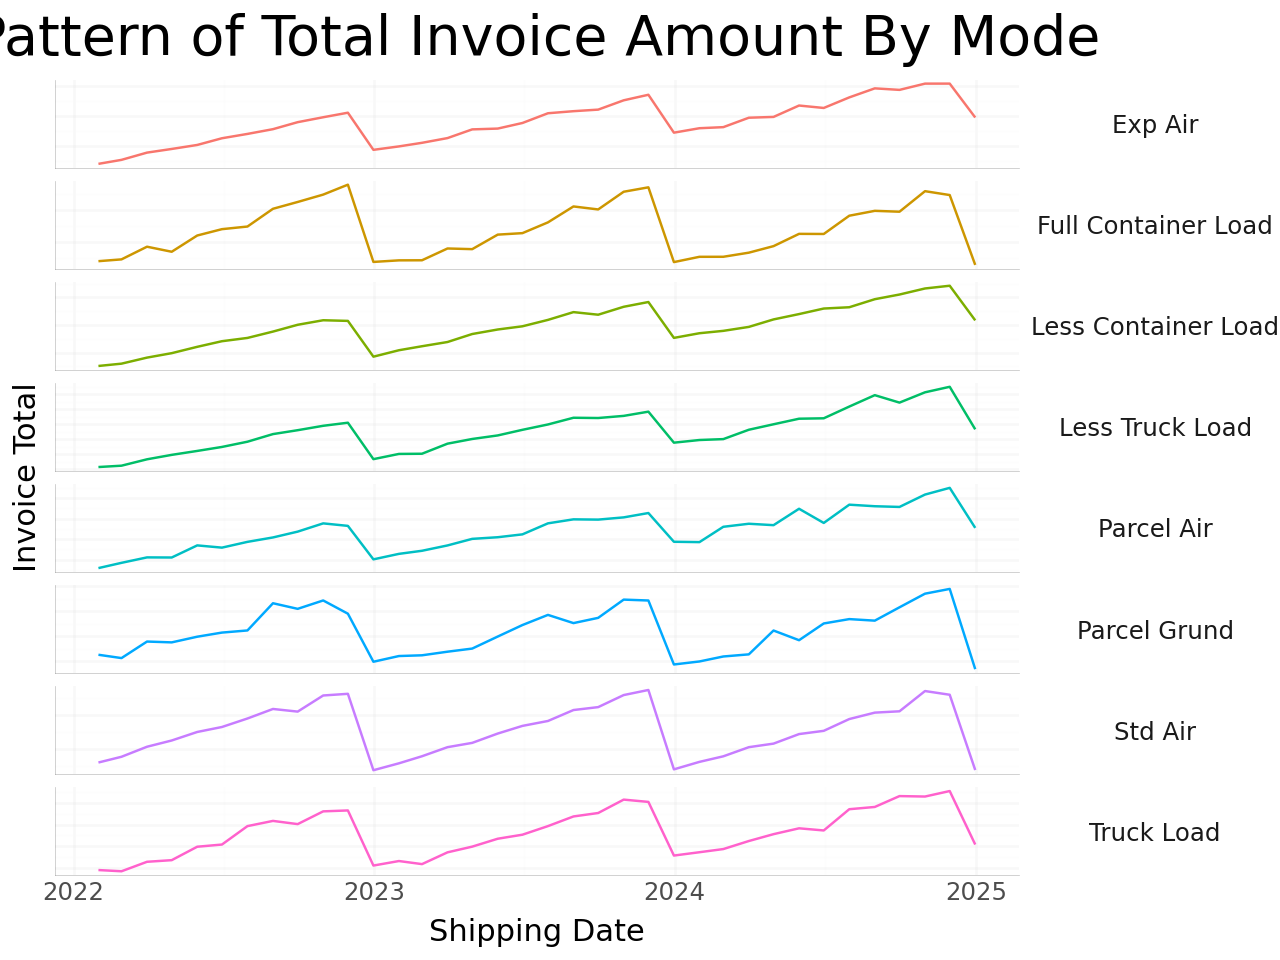

In [38]:
p17 = ggplot(data=df.query('mode.notna() and mode != "other"'
                    ).groupby(by=['mode',pd.Grouper(key='shipping_date', freq='1ME')]
                    ).aggregate({'usda_invoice_amount':'sum'}).reset_index(),#[1:-1],
            mapping=(aes(x='shipping_date',
            y='usda_invoice_amount', group='mode', color='mode')))

p17 = (
    p17 +
    geom_line() +
    scale_y_continuous(labels=lambda x : [int(val/1000) for val in x]) +
    scale_x_date(date_breaks="12 months", date_labels="%Y") +
    labs(
        x='Shipping Date',
        y='Invoice Total',
        title='Pattern of Total Invoice Amount By Mode'
    ) +
    facet_grid('mode', scales='free', 
               labeller=labeller(mode=lambda x: x.replace('_', ' ').title())) +
    custom_theme +
    theme(axis_text_y=element_blank(),
          legend_position='none',
          strip_text_y=element_text(angle=0),
          axis_line=element_line(color='black')
          )
)
ggsave(p17,
       filename='../plots/' + 'invoice_totals_by_mode_facet.png',
       height=6,
       width=8,
       units='in',
       dpi=300
        )
p17
# Plot shows the pattern of each of the modes over time.
# This allows me to see that all the patterns have the same pattern and there is not an outlier.

c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 8 x 6 in image.
c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/invoice_totals_by_mode.png


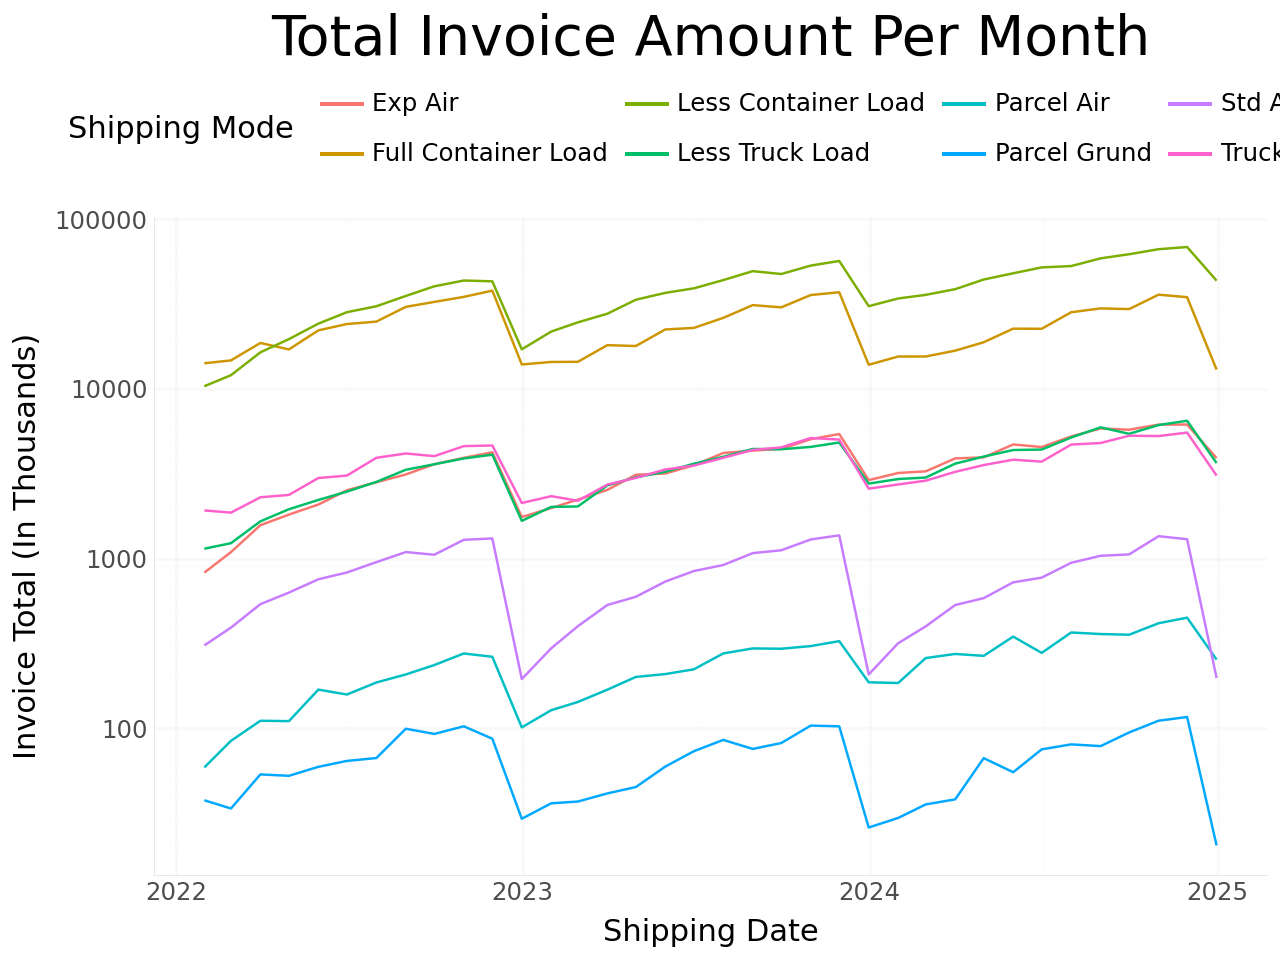

In [39]:
p18 = ggplot(data=df.query('mode.notna() and mode != "other"'
                    ).groupby(by=['mode',pd.Grouper(key='shipping_date', freq='1ME')]
                    ).aggregate({'usda_invoice_amount':'sum'}).reset_index(),#[1:-1],
            mapping=(aes(x='shipping_date',
            y='usda_invoice_amount', group='mode', color='mode')))

p18 = (
    p18 +
    geom_line() +
    scale_y_log10(labels = lambda x: [str(int(val/1000)) for val in x]) +
    scale_x_date(date_breaks="12 months", date_labels="%Y") +
    scale_color_discrete(labels=lambda lab: [x.replace('_', ' ').title() for x in lab])+
    labs(
        x='Shipping Date',
        y='Invoice Total (In Thousands)',
        title='Total Invoice Amount Per Month',
        color='Shipping Mode'
    ) +
    custom_theme +
    theme(
          legend_position='top'
          )
)
ggsave(p18,
       filename='../plots/' + 'invoice_totals_by_mode.png',
       height=6,
       width=8,
       units='in',
       dpi=300
        )

p18
# This plot shows that different shipping modes and compares the difference in the total cost. 
# As to be expected the Full Container and Less Container have the highest dollar value

c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 10 x 6 in image.
c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/invoice_total_per_month_facet_mode.png


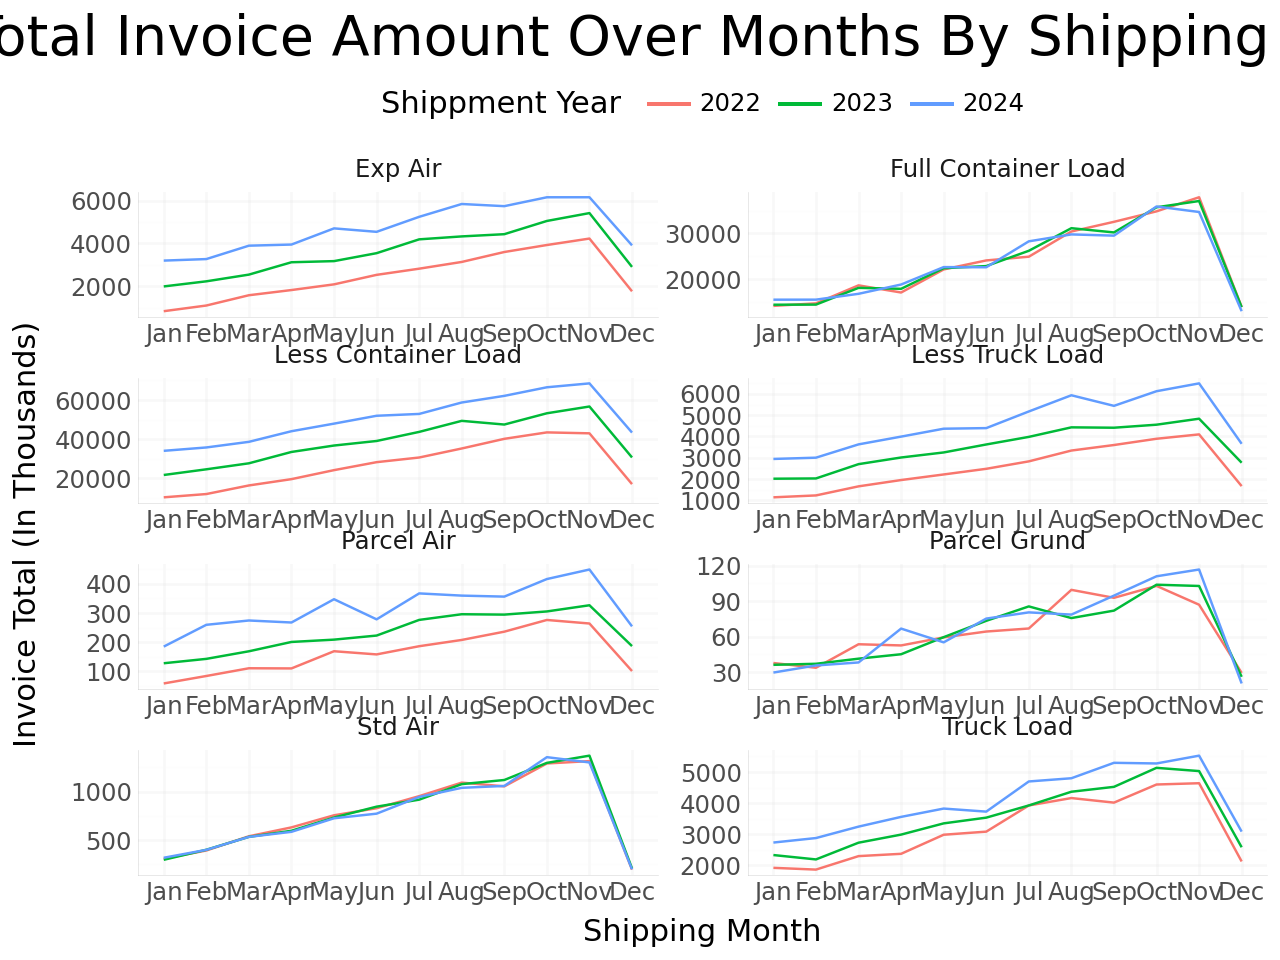

In [40]:
p19_df = df.assign(
    shipping_month = (df['shipping_date'].dt.strftime('%b')).astype(str),
    shipping_year = (df['shipping_date'].dt.year).astype(str)
    ).query(
        'mode.notna() and mode != "other"'
    ).groupby(
        by=['mode','shipping_year', 'shipping_month']
    ).aggregate({
        'usda_invoice_amount':'sum'
    }).reset_index()   

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

p19 = ggplot(data=p19_df,
            mapping=(aes(x='shipping_month',
            y='usda_invoice_amount')))

p19 = (
    p19 +
    geom_line(aes(group='shipping_year',color='shipping_year')) +
    scale_y_continuous(labels=lambda x : [int(val/1000) for val in x]) +
    facet_wrap('mode', scales='free', ncol=2,
            labeller=labeller(mode=lambda x: x.replace('_', ' ').title())) +
    scale_x_discrete(limits=months)+
    scale_color_discrete()+
    labs(
        x='Shipping Month',
        y='Invoice Total (In Thousands)',
        title='Total Invoice Amount Over Months By Shipping Mode',
        caption='',
        color='Shippment Year'
    ) +
    custom_theme +
    theme(
          legend_position='top'
          )
)
ggsave(p19,
       filename='../plots/' + 'invoice_total_per_month_facet_mode.png',
       height=6,
       width=10,
       units='in',
       dpi=300
        )
# This plot breaks down total shipping costs by month then shows that break down for each shipping mode
# This allows me to not only quickly view each shipping mode and compare year over year but also compare
# those trends across shippment type as well. 
p19

While each of these graphs help provide insite to pick a forecasting model. P5 would be the plot that I would share with customers to help explain my findings.

### Cost Estimation and Forecasting Information

##### What can you conclude regarding the existing time-series patterns in the invoice amounts?
From what I can see in the existing time-series patterns is that there is a consistent seasonality not only in the total invoice amounts but from each different mode type as well. Each year, all the shipment modes start relatively low then raise until December, when it drops back to close to their starting point. 

##### How can these patterns help estimate or forecast transportation costs?
These patterns that help us estimate or forecast be picking a forecasting model that will lean into the seasonality of the data. I am familiar with a seasonal ARIMA model and I would start testing with that one if I can to model out 2025 years shipment costs. 

##### Do these patterns differ by transportation mode?
These patterns different slightly. You can group these into two categories, Ones that increase year over year and ones that stay consistent. ‘Exp Air’, ‘Less Container Load’, ‘Parcel Air’, ‘Less Truck Load’, and ‘Truck Load’ grow year over year. ‘Std Air’, ‘Full Container Load’, and ‘Parcel Grund’ all have stable shipment costs year over year. 